# MA428 Numerical Analysis Project 1
## Dirichlet Problem

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import math
import sys

Consider the domain below ⬇️
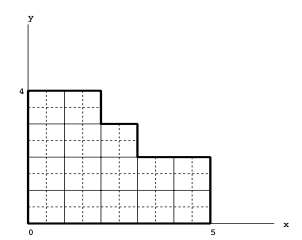
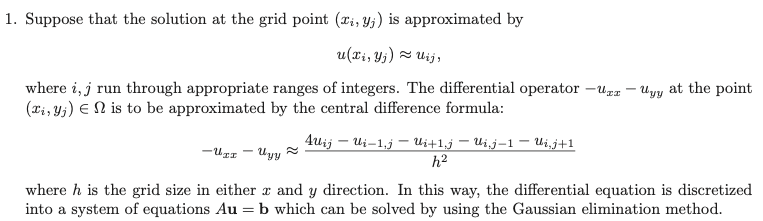

### 1(a)
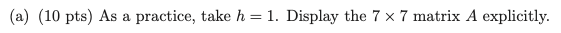

### 1(b)
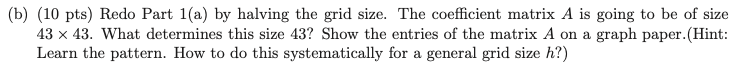

### 1(c)
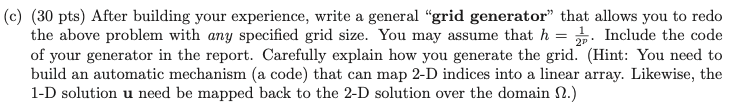

In [142]:
def grid_generator(p):
    h = 1 / (2**p)  # calculate specified grid size
    
    # calculate number of indices that can fit in the bottom block (where 0<y<2)
    block1_row_indices = 5 / h - 1
    block1_column_indices = 2 / h - 1
    block1_indices = block1_row_indices * block1_column_indices
    
    # calculate number of indices that can fit in the middle block (where 2<=y<3)
    block2_row_indices = 3 / h - 1
    block2_column_indices = 1 / h
    block2_indices = block2_row_indices * block2_column_indices
    
    # calculate number of indices that can fit in the top block (where 3<=y<4)
    block3_row_indices = 2 / h - 1
    block3_column_indices = 1 / h
    block3_indices = block3_row_indices * block3_column_indices
    
    matrix_indices = int(block1_indices + block2_indices + block3_indices)
    
    level_boundaries = {}
    for i in range(0, int(matrix_indices)):
        if block1_column_indices > 0:
            level_boundaries[i] = int(block1_row_indices)
            block1_column_indices -= 1
        elif block2_column_indices > 0:
            level_boundaries[i] = int(block2_row_indices)
            block2_column_indices -= 1
        elif block3_column_indices > 0:
            level_boundaries[i] = int(block3_row_indices)
            block3_column_indices -= 1
    print('number of points in each \'level\' of domain: ' + str(level_boundaries))
    
    
    # A matrix
    A = []
    
    # loop through each 'u'
    for i in range(0, matrix_indices):
        u = []
        
        counter = 0
        for row in range(0, len(level_boundaries)):
            items_in_row = level_boundaries[row]
            for j in range(0, items_in_row):
                if counter == i:                                       # current position
                    u.append(4)   
                elif counter+1 == i and j+1 < items_in_row:            # left neighbor
                    u.append(-1)
                elif counter-1 == i and j > 0:                         # right neighbor
                    u.append(-1)
                elif row > 0 and counter-level_boundaries[row-1] == i: # upstairs neighbor
                    u.append(-1)
                elif row < len(level_boundaries)-1 and \
                        j < level_boundaries[row+1] and \
                        counter+level_boundaries[row] == i:            # downstairs neighbor
                            u.append(-1)
                else:
                    u.append(0)
                counter += 1 
            
        A.append(u)
        
    
    return np.matrix(A)

In [144]:
a = grid_generator(2)
print('dimensions of matrix: ' + str(np.shape(a)))

number of points in each 'level' of domain: {0: 19, 1: 19, 2: 19, 3: 19, 4: 19, 5: 19, 6: 19, 7: 11, 8: 11, 9: 11, 10: 11, 11: 7, 12: 7, 13: 7, 14: 7}
dimensions of matrix: (205, 205)


### 1(d)
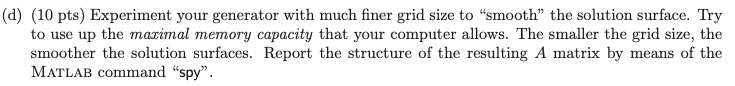

* Using h=1/2^0

number of points in each 'level' of domain: {0: 4, 1: 2, 2: 1}
dimensions of matrix: (7, 7)


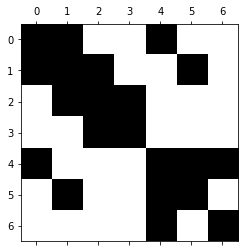

In [154]:
A = grid_generator(0)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

* Using h=1/2^1

number of points in each 'level' of domain: {0: 9, 1: 9, 2: 9, 3: 5, 4: 5, 5: 3, 6: 3}
dimensions of matrix: (43, 43)


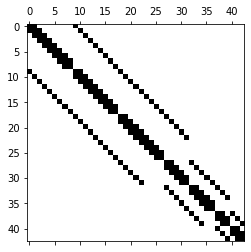

In [156]:
A = grid_generator(1)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

* Using h=1/2^2

number of points in each 'level' of domain: {0: 19, 1: 19, 2: 19, 3: 19, 4: 19, 5: 19, 6: 19, 7: 11, 8: 11, 9: 11, 10: 11, 11: 7, 12: 7, 13: 7, 14: 7}
dimensions of matrix: (205, 205)


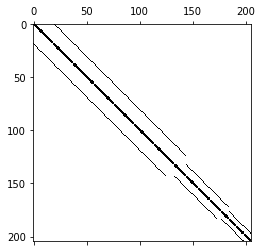

In [150]:
A = grid_generator(2)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

* Using h=1/2^3

number of points in each 'level' of domain: {0: 39, 1: 39, 2: 39, 3: 39, 4: 39, 5: 39, 6: 39, 7: 39, 8: 39, 9: 39, 10: 39, 11: 39, 12: 39, 13: 39, 14: 39, 15: 23, 16: 23, 17: 23, 18: 23, 19: 23, 20: 23, 21: 23, 22: 23, 23: 15, 24: 15, 25: 15, 26: 15, 27: 15, 28: 15, 29: 15, 30: 15}
dimensions of matrix: (889, 889)


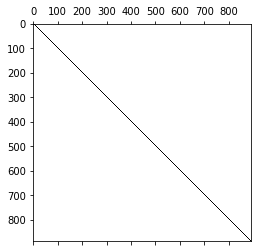

In [151]:
A = grid_generator(3)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

* Using h=1/2^4 ~ takes about 35 seconds on my machine (Macbook 2016 m3, 8gb ram)

number of points in each 'level' of domain: {0: 79, 1: 79, 2: 79, 3: 79, 4: 79, 5: 79, 6: 79, 7: 79, 8: 79, 9: 79, 10: 79, 11: 79, 12: 79, 13: 79, 14: 79, 15: 79, 16: 79, 17: 79, 18: 79, 19: 79, 20: 79, 21: 79, 22: 79, 23: 79, 24: 79, 25: 79, 26: 79, 27: 79, 28: 79, 29: 79, 30: 79, 31: 47, 32: 47, 33: 47, 34: 47, 35: 47, 36: 47, 37: 47, 38: 47, 39: 47, 40: 47, 41: 47, 42: 47, 43: 47, 44: 47, 45: 47, 46: 47, 47: 31, 48: 31, 49: 31, 50: 31, 51: 31, 52: 31, 53: 31, 54: 31, 55: 31, 56: 31, 57: 31, 58: 31, 59: 31, 60: 31, 61: 31, 62: 31}
dimensions of matrix: (3697, 3697)


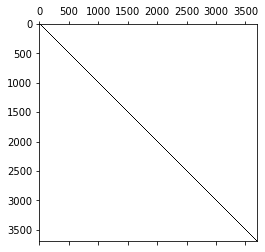

In [152]:
A = grid_generator(4)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

* Using h=1/2^5 ~ takes 4 minutes, 11 seconds on my machine (Macbook 2016 m3, 8gb ram)

number of points in each 'level' of domain: {0: 159, 1: 159, 2: 159, 3: 159, 4: 159, 5: 159, 6: 159, 7: 159, 8: 159, 9: 159, 10: 159, 11: 159, 12: 159, 13: 159, 14: 159, 15: 159, 16: 159, 17: 159, 18: 159, 19: 159, 20: 159, 21: 159, 22: 159, 23: 159, 24: 159, 25: 159, 26: 159, 27: 159, 28: 159, 29: 159, 30: 159, 31: 159, 32: 159, 33: 159, 34: 159, 35: 159, 36: 159, 37: 159, 38: 159, 39: 159, 40: 159, 41: 159, 42: 159, 43: 159, 44: 159, 45: 159, 46: 159, 47: 159, 48: 159, 49: 159, 50: 159, 51: 159, 52: 159, 53: 159, 54: 159, 55: 159, 56: 159, 57: 159, 58: 159, 59: 159, 60: 159, 61: 159, 62: 159, 63: 95, 64: 95, 65: 95, 66: 95, 67: 95, 68: 95, 69: 95, 70: 95, 71: 95, 72: 95, 73: 95, 74: 95, 75: 95, 76: 95, 77: 95, 78: 95, 79: 95, 80: 95, 81: 95, 82: 95, 83: 95, 84: 95, 85: 95, 86: 95, 87: 95, 88: 95, 89: 95, 90: 95, 91: 95, 92: 95, 93: 95, 94: 95, 95: 63, 96: 63, 97: 63, 98: 63, 99: 63, 100: 63, 101: 63, 102: 63, 103: 63, 104: 63, 105: 63, 106: 63, 107: 63, 108: 63, 109: 63, 110: 63, 111

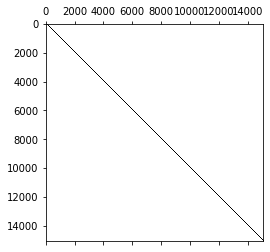

In [153]:
A = grid_generator(5)
print('dimensions of matrix: ' + str(np.shape(A)))
plt.spy(A)

###### Commentary
As the grid size becomes smaller, the grid becomes 'smoother' as can be seen by the above output. We can imagine the reasoning of this because each row in the matrix has at most 5 non-zero entries (current position, left and right neighbor, upstairs and downstairs neighbor). 

However, this smoothing functionality requires a great amount of computational power--even for this small domain. Imagine much larger domains like city maps or airplane blueprints and we are limited to the amount of smoothness we can acheive. 